
2-PSK Analysis:
----------------------------------------
Number of bits per symbol: 1
Symbol Energy (Es): 1
Minimum distance between symbols: 2.000

2-PSK Symbol Coordinates (I, Q):
----------------------------------------
Symbol 0: (1.000, 0.000), Phase: 0.0°
Symbol 1: (-1.000, 0.000), Phase: 180.0°

4-PSK Analysis:
----------------------------------------
Number of bits per symbol: 2
Symbol Energy (Es): 1
Minimum distance between symbols: 1.414

4-PSK Symbol Coordinates (I, Q):
----------------------------------------
Symbol 0: (0.707, 0.707), Phase: 45.0°
Symbol 1: (-0.707, 0.707), Phase: 135.0°
Symbol 2: (-0.707, -0.707), Phase: 225.0°
Symbol 3: (0.707, -0.707), Phase: 315.0°

8-PSK Analysis:
----------------------------------------
Number of bits per symbol: 3
Symbol Energy (Es): 1
Minimum distance between symbols: 0.765

8-PSK Symbol Coordinates (I, Q):
----------------------------------------
Symbol 0: (1.000, 0.000), Phase: 0.0°
Symbol 1: (0.707, 0.707), Phase: 45.0°
Symbol 2:

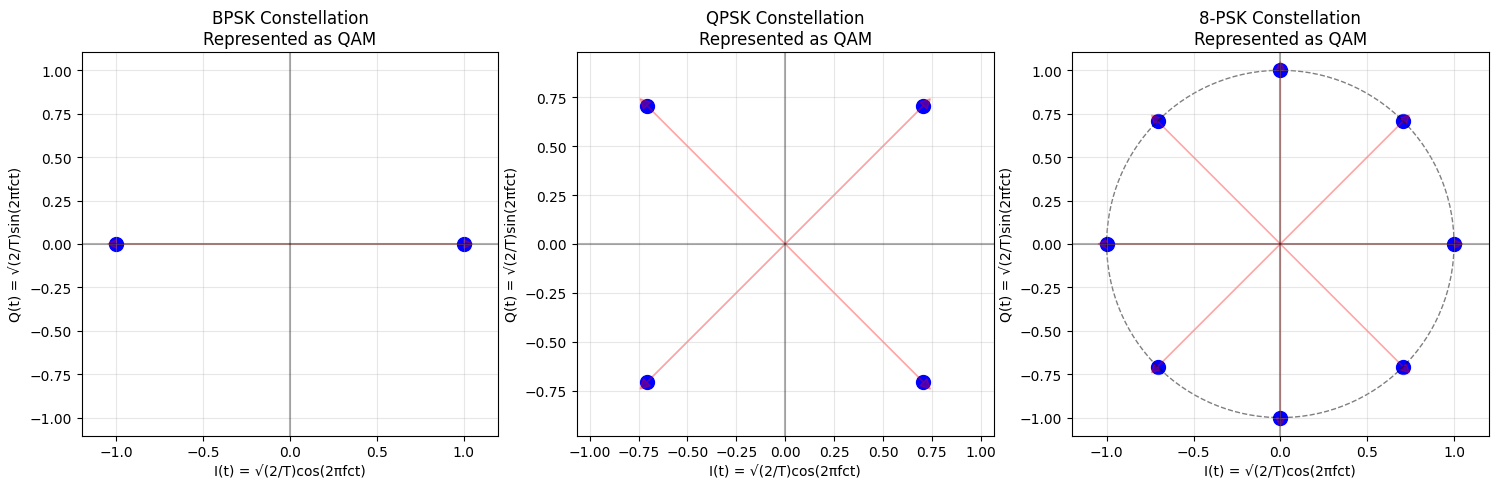


Theoretical Properties:
----------------------------------------

2-PSK:
Bits per symbol: 1
Energy per symbol (Es): 1
Energy per bit (Eb): 1.000
Phase separation: 180.0°
Minimum distance: 2.000
Constellation points: (±1, 0)

4-PSK:
Bits per symbol: 2
Energy per symbol (Es): 1
Energy per bit (Eb): 0.500
Phase separation: 90.0°
Minimum distance: 1.414
Constellation points: (±1/√2, ±1/√2)

8-PSK:
Bits per symbol: 3
Energy per symbol (Es): 1
Energy per bit (Eb): 0.333
Phase separation: 45.0°
Minimum distance: 0.765


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_psk_constellation(M, A=1):
    """Plot PSK constellation diagram showing QAM representation"""
    # Calculate initial phase offset (for QPSK to align with I/Q axes)
    if M == 4:
        phase_offset = np.pi/4
    else:
        phase_offset = 0

    # Calculate phases for M-PSK
    phases = np.arange(0, M) * (2*np.pi/M) + phase_offset

    # Calculate I and Q components
    I = A * np.cos(phases)
    Q = A * np.sin(phases)

    # Plot constellation points
    plt.scatter(I, Q, c='blue', s=100, label='Symbol Points')

    # Plot vectors from origin to constellation points
    for i, q in zip(I, Q):
        plt.arrow(0, 0, i, q, head_width=0.05, head_length=0.05, fc='r', ec='r', alpha=0.3)

    # Draw circle only for 8-PSK
    if M == 8:
        circle = plt.Circle((0, 0), A, fill=False, linestyle='--', alpha=0.5)
        plt.gca().add_artist(circle)

    # Add labels and grid
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    plt.grid(True, alpha=0.3)
    plt.xlabel('I(t) = √(2/T)cos(2πfct)')
    plt.ylabel('Q(t) = √(2/T)sin(2πfct)')

    # Set equal aspect ratio and limits
    plt.axis('equal')
    limit = A * 1.2
    plt.xlim(-limit, limit)
    plt.ylim(-limit, limit)

    name_map = {2: 'BPSK', 4: 'QPSK', 8: '8-PSK'}
    plt.title(f'{name_map[M]} Constellation\nRepresented as QAM')

    # Print symbol coordinates
    print(f"\n{M}-PSK Symbol Coordinates (I, Q):")
    print("-" * 40)
    for i, (x, y) in enumerate(zip(I, Q)):
        phase_deg = (np.degrees(phases[i]) % 360)
        print(f"Symbol {i}: ({x:.3f}, {y:.3f}), Phase: {phase_deg:.1f}°")

    return I, Q

# Set up the figure
plt.figure(figsize=(15, 5))

# Plot constellations for different M
M_values = [2, 4, 8]  # BPSK, QPSK, 8-PSK

for idx, M in enumerate(M_values, 1):
    # Calculate symbol energy
    Es = 1  # Normalized symbol energy
    A = np.sqrt(Es)  # Amplitude for constant energy

    print(f"\n{M}-PSK Analysis:")
    print("-" * 40)
    print(f"Number of bits per symbol: {int(np.log2(M))}")
    print(f"Symbol Energy (Es): {Es}")
    print(f"Minimum distance between symbols: {2*A*np.sin(np.pi/M):.3f}")

    # Plot constellation
    plt.subplot(1, 3, idx)
    I, Q = plot_psk_constellation(M, A)

plt.tight_layout()
plt.show()

# Additional theoretical analysis
print("\nTheoretical Properties:")
print("-" * 40)
for M in M_values:
    Es = 1  # Normalized symbol energy
    bits_per_symbol = int(np.log2(M))
    Eb = Es / bits_per_symbol

    print(f"\n{M}-PSK:")
    print(f"Bits per symbol: {bits_per_symbol}")
    print(f"Energy per symbol (Es): {Es}")
    print(f"Energy per bit (Eb): {Eb:.3f}")
    print(f"Phase separation: {360/M:.1f}°")
    print(f"Minimum distance: {2*np.sqrt(Es)*np.sin(np.pi/M):.3f}")

    if M == 2:
        print("Constellation points: (±1, 0)")
    elif M == 4:
        print("Constellation points: (±1/√2, ±1/√2)")